# Evaluate Model with Data Generated for It

In [119]:
!ls ../resources/nmt_output/en_ja

jiji_onto_ami_conver_train_1-to-1_en_ja_test
jiji_onto_ami_conver_train_1-to-1_en_ja_test.ref
jiji_onto_ami_conver_train_1-to-1_en_ja_valid
jiji_onto_ami_conver_train_1-to-1_en_ja_valid.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_test
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_test.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_valid
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_valid.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_test
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_test.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_valid
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_valid.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3_test
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3_test.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3_valid
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3_valid.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_4_test


In [115]:
!cat ../resources/nmt_output/results.txt

en_ja
------------------------------
jiji_onto_ami_conver_train_1-to-1_en_ja
	valid: 15.11	test: 14.65
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1
	valid: 14.82	test: 15.33
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2
	valid: 14.94	test: 15.20
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3
	valid: 15.01	test: 14.98
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_4
	valid: 14.69	test: 15.38
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_5
	valid: 15.46	test: 15.43

ja_en
------------------------------
jiji_onto_ami_conver_train_1-to-1_ja_en
	valid: 16.90	test: 17.10
jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1
	valid: 17.13	test: 17.21
jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_2
	valid: 17.31	test: 17.46
jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_3
	valid: 17.14	test: 16.89
jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_4
	valid: 17.51	test: 17.46
jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_5
	valid: 1

In [116]:
import pandas as pd
import glob
from collections import defaultdict
import os
import sacrebleu
import matplotlib.pyplot as plt

In [123]:
def get_table(file_list):
    table = dict()
    for ref_file in file_list:
        key = os.path.split(ref_file)[-1].split('.')[0]
        hypo_file = os.path.splitext(ref_file)[0]
        table["reference"] = []
        table[key] = []
        with open(ref_file) as ref_source, open(hypo_file) as hypo_source:
            for ref, hypo in zip(ref_source, hypo_source):
                table["reference"].append(ref.strip())
                table[key].append((hypo.strip(), sacrebleu.corpus_bleu(hypo, ref).score))
    return pd.DataFrame(table)

In [124]:
en_ja_valid = get_table(glob.glob("../resources/nmt_output/en_ja/*valid.ref"))
en_ja_test = get_table(glob.glob("../resources/nmt_output/en_ja/*test.ref"))
ja_en_valid = get_table(glob.glob("../resources/nmt_output/ja_en/*valid.ref"))
ja_en_test = get_table(glob.glob("../resources/nmt_output/ja_en/*test.ref"))

In [ ]:
[(key, *value) for key, value in dict(en_ja.loc[:, en_ja.columns != 'reference'].iloc[0]).items()]

In [125]:
def get_oracle(table):
    results = []
    for _, row in table.loc[:, table.columns != 'reference'].iterrows():
        line = [(key, *value) for key, value in dict(row).items()]
        results.append(max(line, key=lambda x: x[-1])[:-1])
    return results

In [126]:
oracle_en_ja_valid = get_oracle(en_ja_valid)
oracle_en_ja_test = get_oracle(en_ja_test)
oracle_ja_en_valid = get_oracle(ja_en_valid)
oracle_ja_en_test = get_oracle(ja_en_test)

In [128]:
oracle_ja_en_valid

[('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_2_valid',
  'hi, i brought the bags from company a.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_2_valid',
  'may i ask your name?'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1_valid',
  'this is sam lee.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1_valid',
  'may i ask your order number?'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1_valid',
  "yes, it's 47238."),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_5_valid',
  'yes, we have bags ready.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_4_valid',
  'i will take care of greg.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1_valid', 'hi sam.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1_valid',
  'my name is greg.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1_valid',
  'hi, my name is sam lee from company a.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_c

In [129]:
def save_oracle(oracle, reference, save_path, suffix=""):
    with open(save_path + f'/oracle_table_{suffix}.tsv', 'w') as table, open(save_path + f'/oracle_{suffix}.sys', 'w') as target:
        table.write("model\treference\thypothesis\n")
        for (model, sys), ref in zip(oracle, reference):
            table.write('\t'.join((model, ref, sys)) + '\n')
            target.write(sys + '\n')
    return save_path + f'/oracle_table_{suffix}.tsv'

In [130]:
save_oracle(oracle_en_ja_valid, en_ja['reference'], '../resources/nmt_output/en_ja', "valid")
save_oracle(oracle_ja_en_valid, ja_en['reference'], '../resources/nmt_output/ja_en', "valid")
save_oracle(oracle_en_ja_test, en_ja['reference'], '../resources/nmt_output/en_ja', "test")
save_oracle(oracle_ja_en_test, ja_en['reference'], '../resources/nmt_output/ja_en', "test")

'../resources/nmt_output/ja_en/oracle_table_test.tsv'

In [272]:
enja_table_valid = pd.read_csv('../resources/nmt_output/en_ja/oracle_table_valid.tsv', delimiter='\t')
jaen_table_valid = pd.read_csv('../resources/nmt_output/ja_en/oracle_table_valid.tsv', delimiter='\t')
enja_table_test = pd.read_csv('../resources/nmt_output/en_ja/oracle_table_test.tsv', delimiter='\t')
jaen_table_test = pd.read_csv('../resources/nmt_output/ja_en/oracle_table_test.tsv', delimiter='\t')

In [224]:
def readable_model_name(model):
    if 'bias' not in model:
        return -1
    else:
        return model.split("_bias_")[-1][0]

In [273]:
enja_table_valid['model'] = enja_table_valid['model'].apply(readable_model_name)
jaen_table_valid['model'] = jaen_table_valid['model'].apply(readable_model_name)
enja_table_test['model'] = enja_table_test['model'].apply(readable_model_name)
jaen_table_test['model'] = jaen_table_test['model'].apply(readable_model_name)

In [271]:
def get_real_context(table, lengths):
    real_bias = []
    start = 0
    for length in lengths:
        for index, row in table.iloc[start:start + length].iterrows():
            model = int(row['model'])
            if model == -1 or index < model:
                real_bias.append(-1)
            else:
                real_bias.append(model)
        start = length
    table['context_sentence_distance'] = list(map(str, real_bias))
    #return real_bias

In [274]:
get_real_context(enja_table_valid, valid_lengths)
get_real_context(enja_table_test, test_lengths)
get_real_context(jaen_table_valid, valid_lengths)
get_real_context(jaen_table_test, test_lengths)

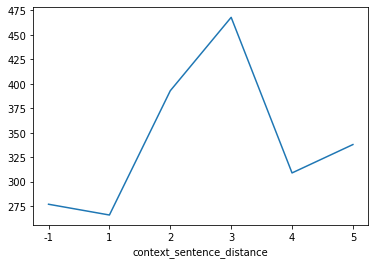

In [275]:
enja_table_valid.groupby('context_sentence_distance').count()['reference'].plot()

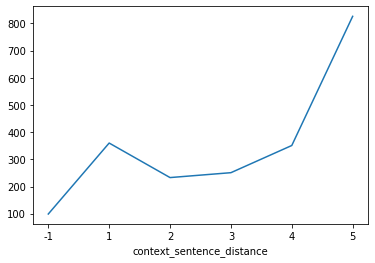

In [276]:
enja_table_test.groupby('context_sentence_distance').count()['reference'].plot()

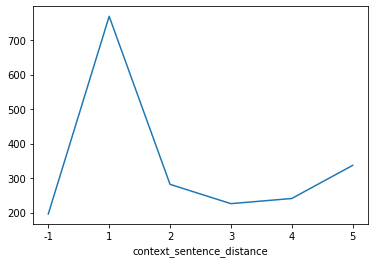

In [277]:
jaen_table_valid.groupby('context_sentence_distance').count()['reference'].plot()

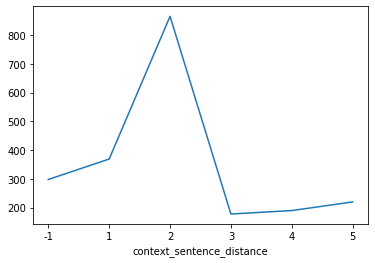

In [278]:
jaen_table_test.groupby('context_sentence_distance').count()['reference'].plot()

In [289]:
def merge_table(a, b):
    result = {}
    result['valid'] = dict(a.groupby('context_sentence_distance').count()['reference'])
    result['test'] = dict(b.groupby('context_sentence_distance').count()['reference'])
    return result

In [290]:
enja_table = merge_table(enja_table_test, enja_table_valid)
jaen_table = merge_table(jaen_table_test, jaen_table_valid)

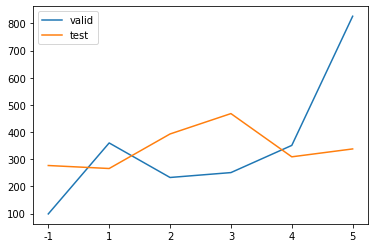

In [300]:
ax = pd.DataFrame(enja_table).plot()

In [302]:
ax.figure.savefig('/home/litong/context_translation/resources/nmt_output/enja_oracle_distribution.png')

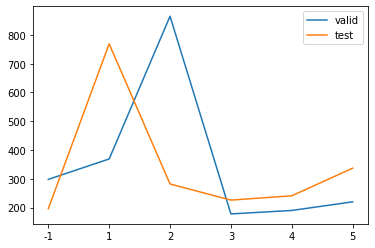

In [303]:
ax = pd.DataFrame(jaen_table).plot()
ax.figure.savefig('/home/litong/context_translation/resources/nmt_output/jaen_oracle_distribution.png')

In [212]:
train_path = '/home/litong/context_translation/resources/train_77b9dbd0538187438b8dd13a8f6b935c.pkl'
valid_path = '/home/litong/context_translation/resources/valid_0a06896723176aff827aac15a2e1ac94.pkl'
test_path = '/home/litong/context_translation/resources/test_312c4d4a71cc6fc659e7a08be8346726.pkl'

In [239]:
import pickle
def get_lengths(path):
    with open(path, 'rb') as source:
        data = pickle.load(source)
    return [len(doc["pairs"]) for doc in data.values()]

In [240]:
valid_lengths = get_lengths(valid_path)
test_lengths = get_lengths(test_path)

In [241]:
sum(test_lengths)

2120

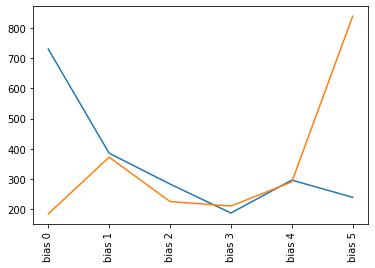

In [113]:
plt.xticks(rotation=90)
plt.plot([f"bias {index}" for index in range(0, 6)], enja_table.groupby('model').count()['reference'], label="enja")
plt.plot([f"bias {index}" for index in range(0, 6)], jaen_table.groupby('model').count()['reference'], label="jaen")

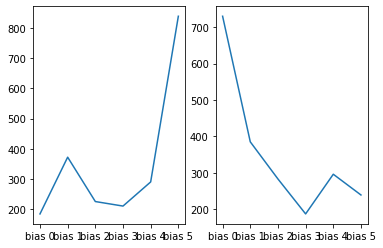

In [93]:
plt.subplot(1, 2, 1)
plt.plot([f"bias {index}" for index in range(0, 6)], jaen_table.groupby('model').count()['reference'], label="jaen")
plt.subplot(1, 2, 2)
plt.plot([f"bias {index}" for index in range(0, 6)], enja_table.groupby('model').count()['reference'], label="enja")

In [55]:
!cat ../resources/nmt_output/en_ja/oracle.sys | sacrebleu -b -w 2 ../resources/nmt_output/en_ja/jiji_onto_ami_conver_train_1-to-1_en_ja.ref
!cat ../resources/nmt_output/ja_en/oracle.sys | sacrebleu -b -w 2 ../resources/nmt_output/ja_en/jiji_onto_ami_conver_train_1-to-1_ja_en.ref

22.31
25.01


# Evaluate Model with All Kind of Data

In [68]:
!ls ../resources/hybird_nmt_output/en_ja

jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_1
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_1.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_2
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_2.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_3
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_3.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_4
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_4.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_5
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_5.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_1
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_1.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_2
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_2.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_3
jiji_onto_ami_conver_train_2-to-1_en_ja_co

In [99]:
os.path.splitext(glob.glob("../resources/hybird_nmt_output/en_ja/*ref")[0])

('../resources/hybird_nmt_output/en_ja/jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_4_Bias_3',
 '.ref')

In [101]:
for direction in ("en_ja", "ja_en"):
    for bias in range(1, 6):
        table = get_table(glob.glob(f"../resources/hybird_nmt_output/{direction}/*bias_{bias}*ref"))
        oracle = get_oracle(table)
        tsv_path = save_oracle(oracle, table["reference"], f"../resources/hybird_nmt_output/{direction}/", f"bias_{bias}_model")

In [102]:
for direction in ("en_ja", "ja_en"):
    for bias in range(1, 6):
        table = get_table(glob.glob(f"../resources/hybird_nmt_output/{direction}/*Bias_{bias}*ref"))
        oracle = get_oracle(table)
        tsv_path = save_oracle(oracle, table["reference"], f"../resources/hybird_nmt_output/{direction}/", f"bias_{bias}_data")

In [112]:
!cat ../resources/hybird_nmt_output/results.txt

en_ja
------------------------------
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1
	Data -> Bias_1: 15.33
	Data -> Bias_2: 15.08
	Data -> Bias_3: 15.00
	Data -> Bias_4: 15.18
	Data -> Bias_5: 14.92
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2
	Data -> Bias_1: 15.41
	Data -> Bias_2: 15.20
	Data -> Bias_3: 15.45
	Data -> Bias_4: 15.41
	Data -> Bias_5: 15.01
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3
	Data -> Bias_1: 15.31
	Data -> Bias_2: 15.40
	Data -> Bias_3: 14.98
	Data -> Bias_4: 15.22
	Data -> Bias_5: 14.94
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_4
	Data -> Bias_1: 15.31
	Data -> Bias_2: 15.53
	Data -> Bias_3: 15.37
	Data -> Bias_4: 15.38
	Data -> Bias_5: 15.24
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_5
	Data -> Bias_1: 15.46
	Data -> Bias_2: 15.44
	Data -> Bias_3: 15.43
	Data -> Bias_4: 15.50
	Data -> Bias_5: 15.43

ja_en
------------------------------
Model -> jiji_onto_ami_conver_

## Oracle scores for en -> ja

In [108]:
!find ../resources/hybird_nmt_output/en_ja -type f -name "*data.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/en_ja/reference"

../resources/hybird_nmt_output/en_ja/oracle_bias_1_data.sys
21.66
../resources/hybird_nmt_output/en_ja/oracle_bias_2_data.sys
21.58
../resources/hybird_nmt_output/en_ja/oracle_bias_3_data.sys
21.49
../resources/hybird_nmt_output/en_ja/oracle_bias_4_data.sys
21.55
../resources/hybird_nmt_output/en_ja/oracle_bias_5_data.sys
21.41


In [109]:
!find ../resources/hybird_nmt_output/en_ja -type f -name "*model.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/en_ja/reference"

../resources/hybird_nmt_output/en_ja/oracle_bias_1_model.sys
18.51
../resources/hybird_nmt_output/en_ja/oracle_bias_2_model.sys
18.71
../resources/hybird_nmt_output/en_ja/oracle_bias_3_model.sys
18.23
../resources/hybird_nmt_output/en_ja/oracle_bias_4_model.sys
18.31
../resources/hybird_nmt_output/en_ja/oracle_bias_5_model.sys
18.68


## Oracle scores for ja -> en

In [111]:
# Use n-biased data on every 2-to-1 system
!find ../resources/hybird_nmt_output/ja_en -type f -name "*data.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/ja_en/reference"

../resources/hybird_nmt_output/ja_en/oracle_bias_1_data.sys
24.28
../resources/hybird_nmt_output/ja_en/oracle_bias_2_data.sys
24.08
../resources/hybird_nmt_output/ja_en/oracle_bias_3_data.sys
23.95
../resources/hybird_nmt_output/ja_en/oracle_bias_4_data.sys
23.90
../resources/hybird_nmt_output/ja_en/oracle_bias_5_data.sys
23.92


In [110]:
# Use every kind of biased data on each n-biased 2-to-1 system
!find ../resources/hybird_nmt_output/ja_en -type f -name "*model.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/ja_en/reference"

../resources/hybird_nmt_output/ja_en/oracle_bias_1_model.sys
21.05
../resources/hybird_nmt_output/ja_en/oracle_bias_2_model.sys
20.79
../resources/hybird_nmt_output/ja_en/oracle_bias_3_model.sys
20.72
../resources/hybird_nmt_output/ja_en/oracle_bias_4_model.sys
20.75
../resources/hybird_nmt_output/ja_en/oracle_bias_5_model.sys
20.54
